In [ ]:
# LSTM on Stock Data and Comparision to an ARIMA Model



In [4]:
import yfinance as yf
import pandas as pd
import os

In [38]:
 #Daily auto updating stock info from Yahoo Finance
  msft_ticker = yf.Ticker("MSFT")
  df = msft_ticker.history(period="max")
  df.to_csv("MSFT.csv")
  df.index = pd.to_datetime(df.index)
  df




,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055004,0.063093,0.055004,0.060396,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060396,0.063632,0.060396,0.062553,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062553,0.064172,0.062553,0.063632,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063632,0.064172,0.061475,0.062014,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062014,0.062553,0.060396,0.060936,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-26 00:00:00-04:00,315.130005,315.880005,310.019989,312.140015,26297600,0.0,0.0
2023-09-27 00:00:00-04:00,312.299988,314.299988,309.690002,312.790009,19410100,0.0,0.0
2023-09-28 00:00:00-04:00,310.989990,315.480011,309.450012,313.640015,19683600,0.0,0.0


In [ ]:
# .csv file as alternate source if needed

df = pd.read_csv('MSFT.csv')


df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9459,2023-09-25,316.589996,317.670013,315.000000,317.540009,317.540009,17836000
9460,2023-09-26,315.130005,315.880005,310.019989,312.140015,312.140015,26297600
9461,2023-09-27,312.299988,314.299988,309.690002,312.790009,312.790009,19410100
9462,2023-09-28,310.989990,315.480011,309.450012,313.640015,313.640015,19683600


In [39]:
df = df[['Date', 'Close']]

df

KeyError: ignored

In [40]:
df['Date']

KeyError: ignored

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [ ]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9459,2023-09-25,317.540009
9460,2023-09-26,312.140015
9461,2023-09-27,312.790009
9462,2023-09-28,313.640015


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-67-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9459   2023-09-25
9460   2023-09-26
9461   2023-09-27
9462   2023-09-28
9463   2023-09-29
Name: Date, Length: 9464, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-09-25,317.540009
2023-09-26,312.140015
2023-09-27,312.790009


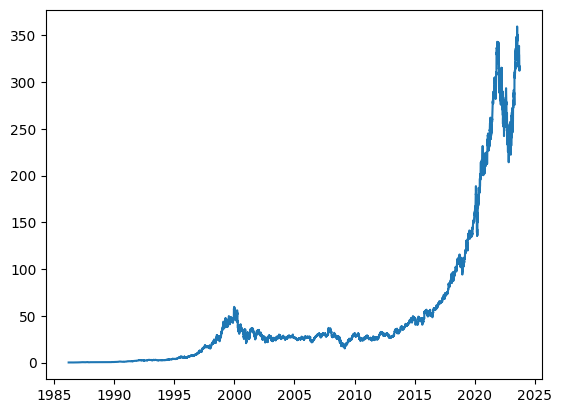

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-29',
                                '2023-09-29',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-29,235.460007,232.339996,236.479996,235.240005
1,2021-03-30,232.339996,236.479996,235.240005,231.850006
2,2021-03-31,236.479996,235.240005,231.850006,235.770004
3,2021-04-01,235.240005,231.850006,235.770004,242.350006
4,2021-04-05,231.850006,235.770004,242.350006,249.070007
...,...,...,...,...,...
627,2023-09-25,320.769989,319.529999,317.010010,317.540009
628,2023-09-26,319.529999,317.010010,317.540009,312.140015
629,2023-09-27,317.010010,317.540009,312.140015,312.790009
630,2023-09-28,317.540009,312.140015,312.790009,313.640015


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((632,), (632, 3, 1), (632,))

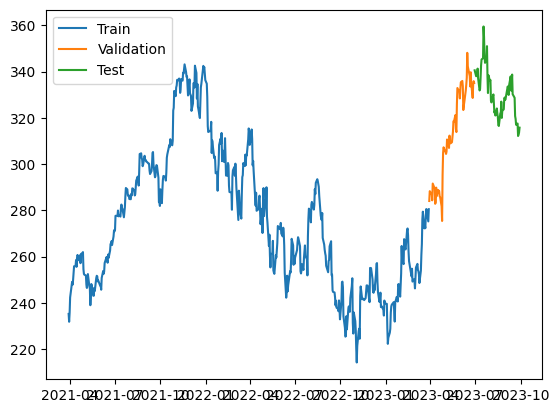

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 4s 44ms/step - loss: 75789.0625 - mean_absolute_error: 273.6864 - val_loss: 96443.9609 - val_mean_absolute_error: 309.9139
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 74502.4766 - mean_absolute_error: 271.3338 - val_loss: 94461.8125 - val_mean_absolute_error: 306.6998
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 72471.4453 - mean_absolute_error: 267.5542 - val_loss: 91622.1562 - val_mean_absolute_error: 302.0347
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 69136.2344 - mean_absolute_error: 261.2202 - val_loss: 86565.5078 - val_mean_absolute_error: 293.5410
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 63560.4531 - mean_absolute_error: 250.3004 - val_loss: 79046.0938 - val_mean_absolute_error: 280.4442
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 56401.5977 - mean_absolute_error: 235.5930 - val_lo

16/16 [==============================] - 1s 3ms/step


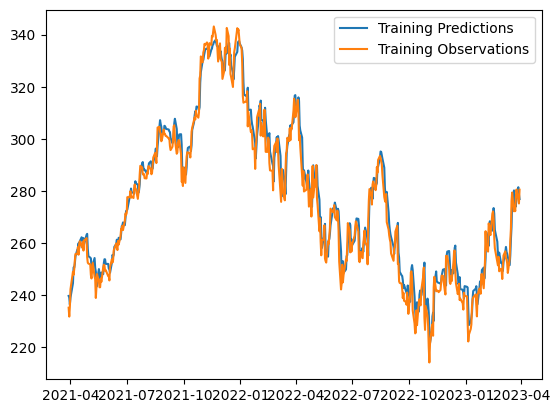

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 5ms/step


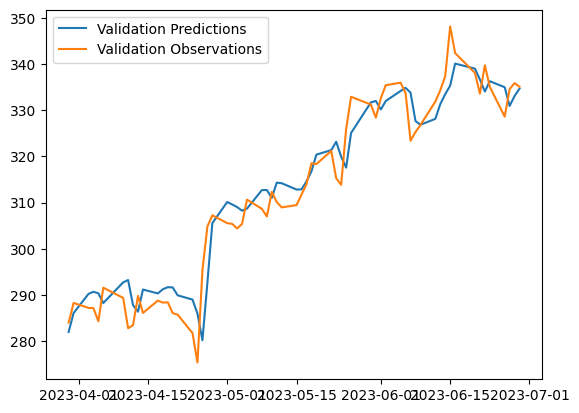

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


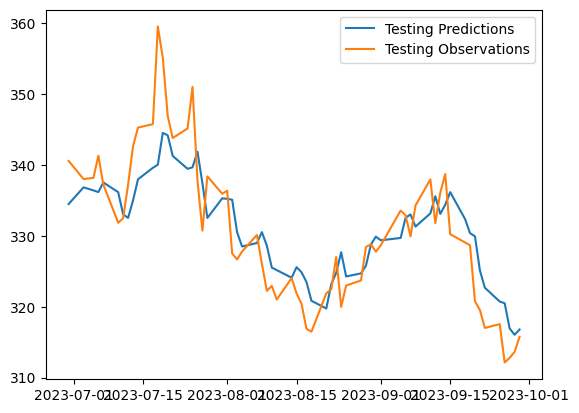

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

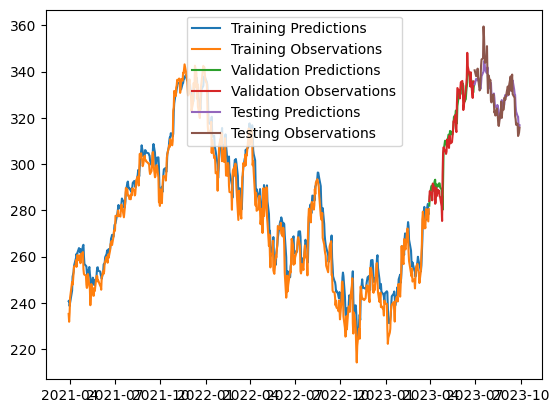

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.concatenate([last_window[1:], [next_prediction]])

1/1 [==============================] - 0s 24ms/step


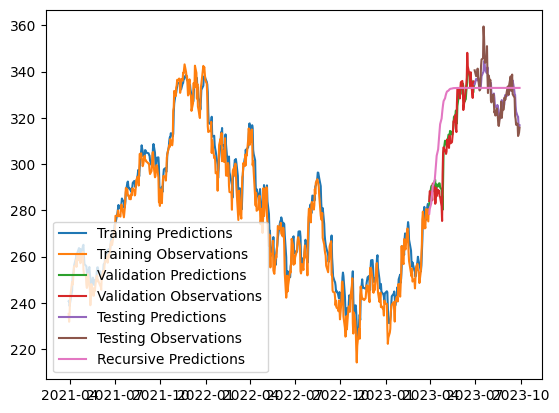

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

<ipython-input-32-f53ac649b67b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dY'] = df['Close'].diff()


         Date     Close        dY
0  1986-03-13  0.097222       NaN
1  1986-03-14  0.100694  0.003472
2  1986-03-17  0.102431  0.001737
3  1986-03-18  0.099826 -0.002605
4  1986-03-19  0.098090 -0.001736
count    9464.000000
mean       50.920632
std        75.256362
min         0.090278
25%         5.460938
50%        27.170000
75%        44.704999
max       359.489990
Name: Close, dtype: float64
count    9463.000000
mean        0.033357
std         1.657115
min       -23.410004
25%        -0.171875
50%         0.000868
75%         0.218750
max        19.949982
Name: dY, dtype: float64


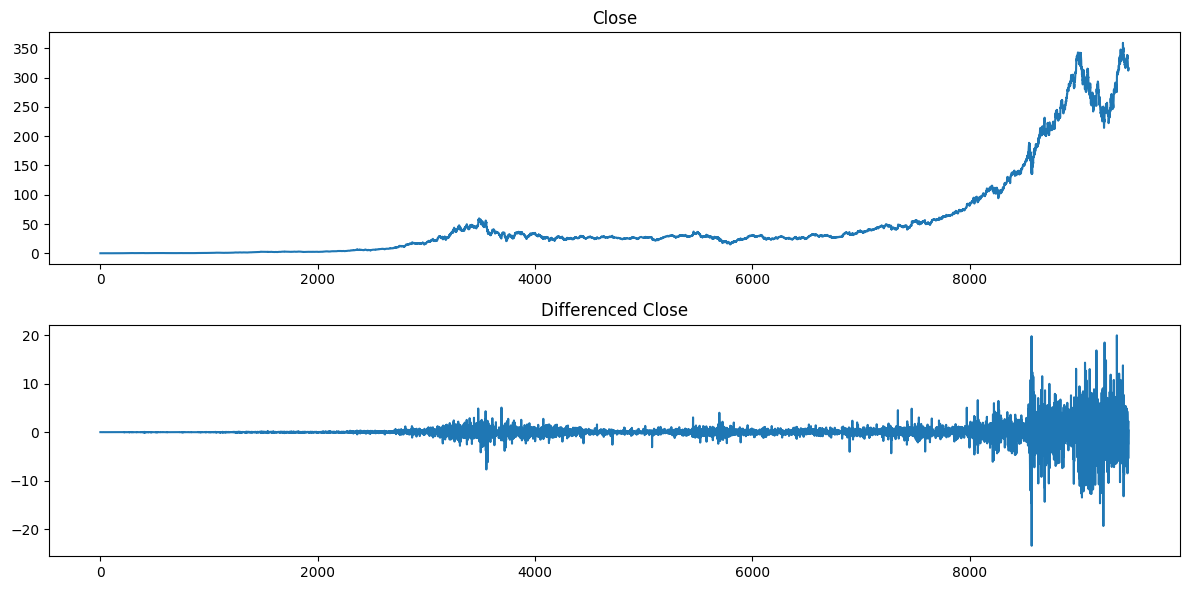

ADF Statistic for CLose: 2.8091295073547893
p-value: 1.0
ADF Statistic for Differenced Close: -16.017479855901247
p-value: 6.257452973770676e-29


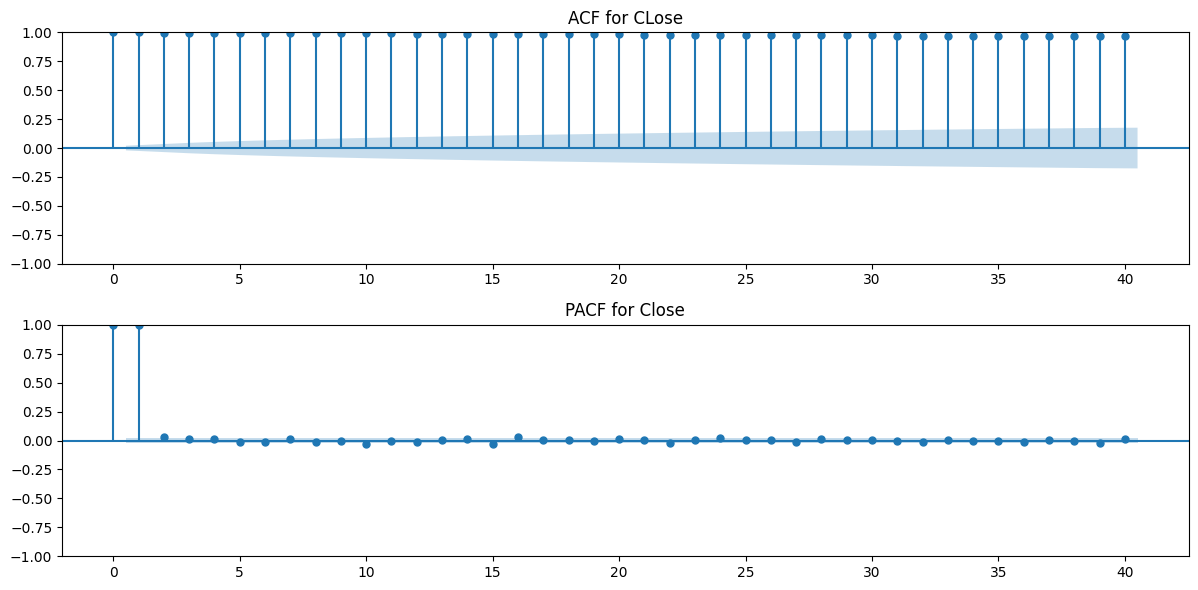

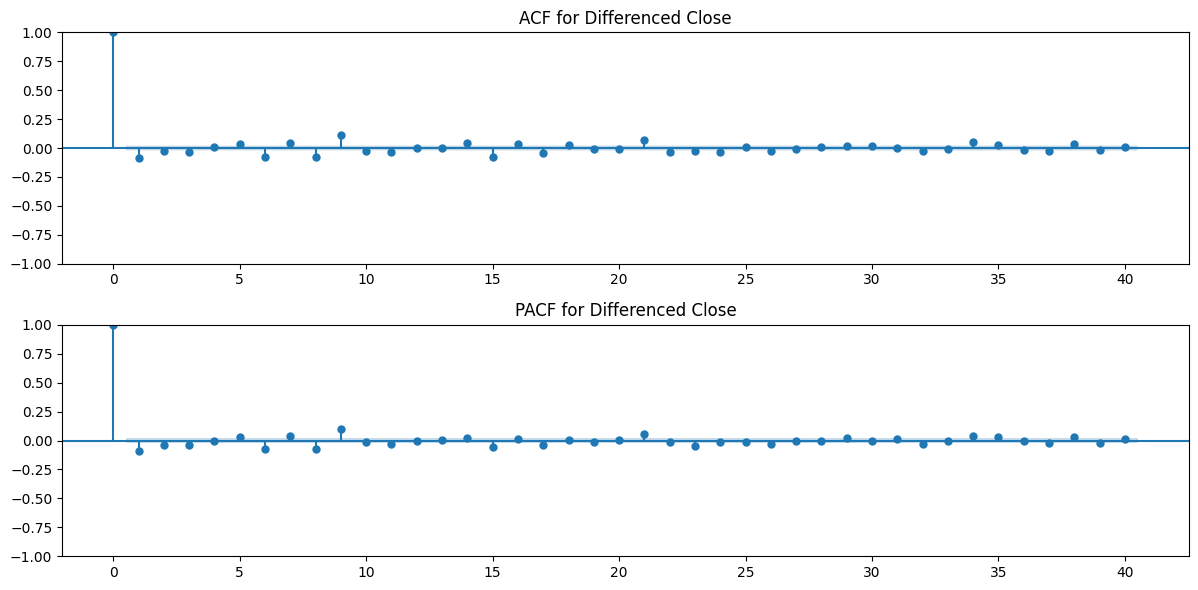

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


# Compute differenced series
df['dY'] = df['Close'].diff()

# Descriptive statistics and plotting the data
print(df.head())
print(df['Close'].describe())
print(df['dY'].describe())

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'])
plt.title('Close')
plt.subplot(2, 1, 2)
plt.plot(df.index, df['dY'])
plt.title('Differenced Close')
plt.tight_layout()
plt.show()

# Dickey-Fuller test for the original variable
adf_result = adfuller(df['Close'], autolag='AIC')
print("ADF Statistic for CLose:", adf_result[0])
print("p-value:", adf_result[1])

# Augmented Dickey-Fuller test for the original variable
adf_result_diff = adfuller(df['dY'].dropna(), autolag='AIC')
print("ADF Statistic for Differenced Close:", adf_result_diff[0])
print("p-value:", adf_result_diff[1])

# ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['Close'], ax=plt.gca(), lags=40)
plt.title('ACF for CLose')
plt.subplot(2, 1, 2)
plot_pacf(df['Close'], ax=plt.gca(), lags=40)
plt.title('PACF for Close')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['dY'].dropna(), ax=plt.gca(), lags=40)
plt.title('ACF for Differenced Close')
plt.subplot(2, 1, 2)
plot_pacf(df['dY'].dropna(), ax=plt.gca(), lags=40)
plt.title('PACF for Differenced Close')
plt.tight_layout()
plt.show()



In [ ]:
# ARIMA(5,1,0) Model
model = ARIMA(df['Close'], order=(5, 1, 0))
arima_fit = model.fit()
print(arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 9464
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -18154.756
Date:                Tue, 03 Oct 2023   AIC                          36321.513
Time:                        01:48:15   BIC                          36364.443
Sample:                             0   HQIC                         36336.084
                               - 9464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0917      0.003    -29.980      0.000      -0.098      -0.086
ar.L2         -0.0376      0.003    -11.976      0.000      -0.044      -0.031
ar.L3         -0.0363      0.003    -10.394      0.0

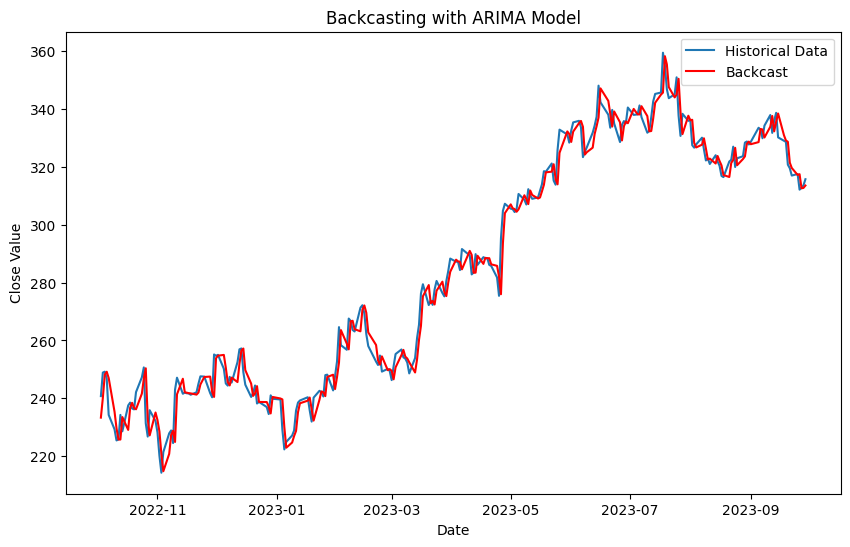

In [ ]:
# Number of historical data points used for backcasting
historical_data_points = 250  # You can adjust this number based on your requirement

# Extract the historical data points
historical_data = df['Close'][-historical_data_points:]

# Backcast using the ARIMA model
backcast = arima_fit.predict(start=historical_data.index[0], end=historical_data.index[-1], typ='levels')

# Plot historical data
plt.figure(figsize=(10, 6))
plt.plot(historical_data.index, historical_data.values, label='Historical Data')

# Plot backcasted values
plt.plot(historical_data.index, backcast, label='Backcast', color='red')

plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Backcasting with ARIMA Model')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


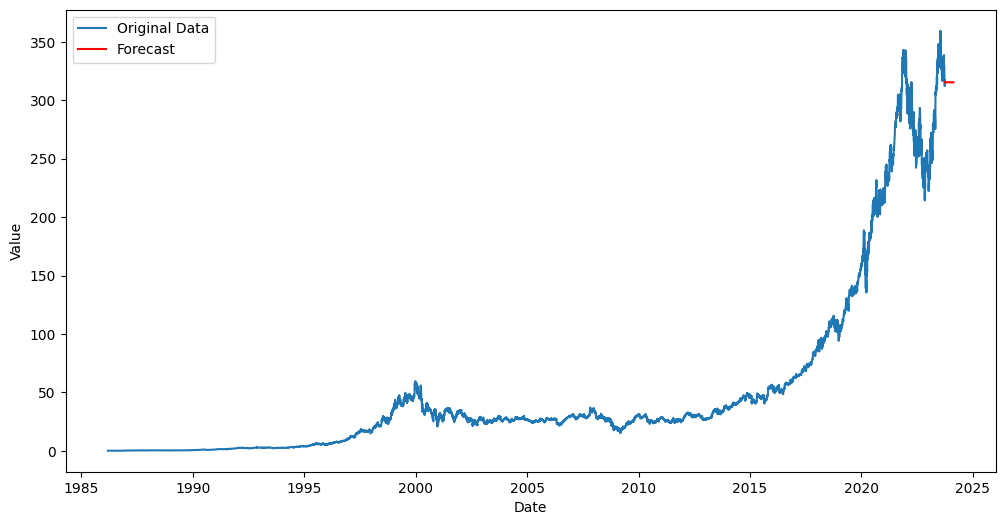

In [ ]:
forecast_steps = 100
forecast = arima_fit.forecast(steps=forecast_steps)
# Plotting the original data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Original Data')

# Constructing x-values for the forecast plot
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps, freq='B')

# Plotting the forecasted values
plt.plot(forecast_index, forecast, color='red', label='Forecast')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Calculate standard errors for the forecast
stderr = arima_fit.bse

# Calculate 95% confidence intervals
margin_of_error = 1.96 * stderr  # 1.96 is the Z-score for 95% confidence interval
lower_bound = forecast - margin_of_error
upper_bound = forecast + margin_of_error


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  500
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1544.948
Date:                Tue, 03 Oct 2023   AIC                           3101.897
Time:                        02:00:02   BIC                           3127.173
Sample:                             0   HQIC                          3111.816
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0110      0.045     -0.244      0.807      -0.099       0.077
ar.L2         -0.0892      0.043     -2.065      0.039      -0.174      -0.005
ar.L3         -0.0456      0.046     -1.002      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: ignored

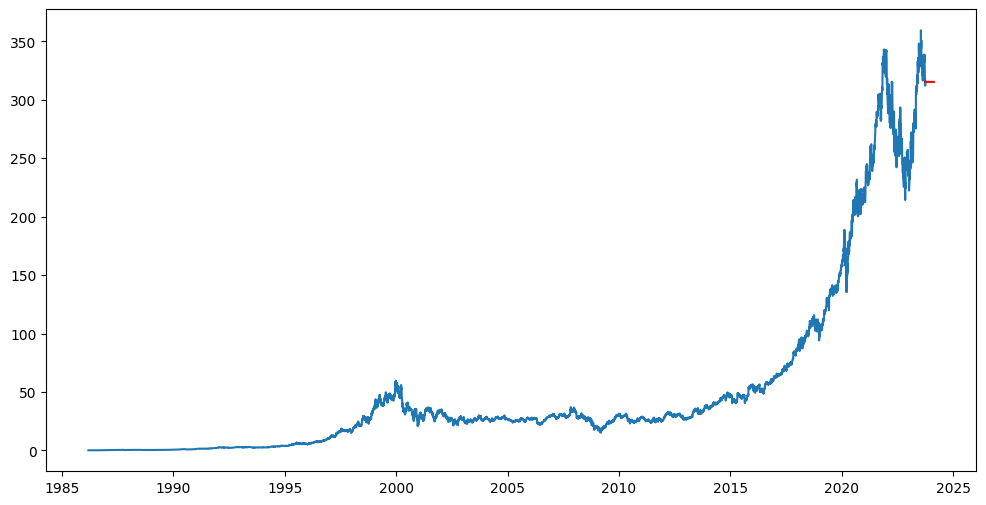

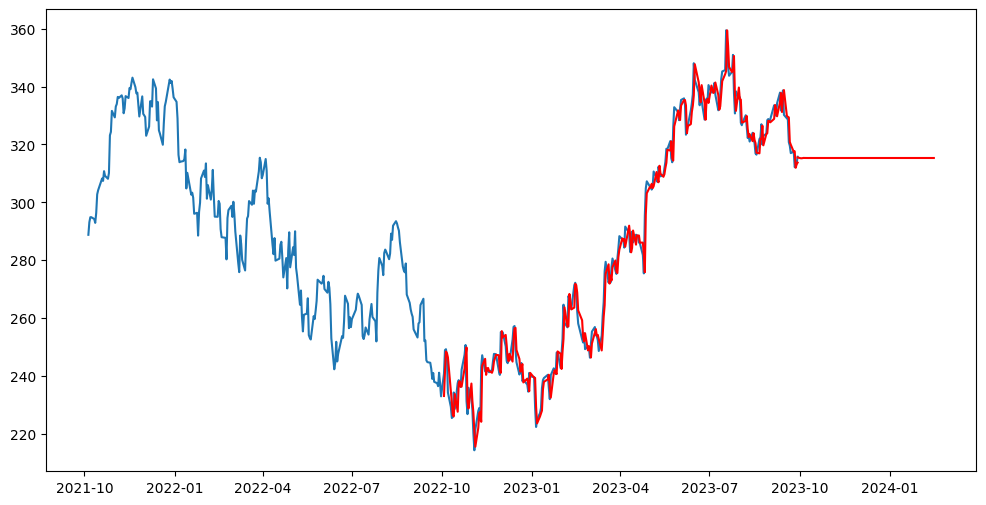

In [ ]:
# Get the latest 500 data points
latest_data = df['Close'][-500:]

# ARIMA(5,1,0) Model
model = ARIMA(latest_data, order=(5, 1, 0))
arima_fit_2 = model.fit()
print(arima_fit_2.summary())


forecast_steps = 100
forecast = arima_fit.forecast(steps=forecast_steps)
# Plotting the original data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Original Data')

# Constructing x-values for the forecast plot
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps, freq='B')

# Plotting the forecasted values
plt.plot(forecast_index, forecast, color='red', label='Forecast')


# Plotting the latest 500 data points
plt.figure(figsize=(12, 6))
plt.plot(latest_data.index, latest_data.values, label='Latest 500 Data Points')

# Constructing x-values for the forecast plot
forecast_index = pd.date_range(start=latest_data.index[-1], periods=forecast_steps, freq='B')


backcast = arima_fit_2.predict(start=historical_data.index[0], end=historical_data.index[-1], typ='levels')
plt.plot(historical_data.index, backcast, label='Backcast', color='red')

# Plotting the forecasted values
plt.plot(forecast_index, forecast, color='red', label='Forecast')

# Plotting the confidence intervals
lower_bound = forecast - 1.96 * stderr  # 1.96 is the Z-score for 95% confidence interval
upper_bound = forecast + 1.96 * stderr
plt.fill_between(forecast_index, lower_bound, upper_bound, color='pink', alpha=0.5, label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('ARIMA Forecast with Confidence Intervals')
plt.legend()
plt.show()



In [ ]:
#auto.arima function to fit best model fit

!pip install pmdarima
from pmdarima.arima import auto_arima


# Perform automatic ARIMA model selection
model = auto_arima(df['Close'], seasonal=False, stepwise=True, suppress_warnings=True,
                   error_action="ignore", max_order=None)

# Print the summary of the best ARIMA model
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 9464
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -18172.213
Date:                Tue, 03 Oct 2023   AIC                          36348.426
Time:                        00:10:34   BIC                          36362.736
Sample:                             0   HQIC                         36353.283
                               - 9464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0873      0.003    -29.875      0.000      -0.093      -0.082
sigma2         2.7259      0.010    267.894      0.000       2.706       2.746
Ljung-Box (L1) (Q):                   0.12   Jarque-